In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Theo Hernández,fr FRA,DF,Milan,it Serie A,25.0,1997.0,97.0,95.0,8415,93.5,0.17,0.31,0.15,0.29,0.13,0.28,0.11,0.26,272.0,141.0,52.0,118.0,43.0,68.72,2.58,16.66,33.33,19.91,2.24,68.68,2.91,1.51,1.26,39.18,278.91,174.26,4.00,2.88,0.76,1.74,0.75,43.07,5.08,3.040000,0.380000,1.86,0.49,0.15,0.18,0.31,1.86,0.29,0.02,0.02,0.03,0.01,0.01,4322.0,5383.0,80.0,69809.0,23453.0,2291.0,2557.0,90.0,1580.0,1904.0,83.0,336.0,593.0,57.0,0.00,0.15,0.14,-0.01,1.39,3.25,1.20,0.39,4.03,57.57,47.03,10.36,1.73,0.06,0.59,3.15,7.86,0.77,0.04,0.68,0.00,46.22,0.18,1.28,1.480000,0.400000,3.60,13.42,2.33,3.9,3.6,67.0,0.25,0.02,0.01,1.02,2.27,0.17,0.83,0.94,0.02,0.00,6.63,1.20,0.58,3,0,0,3,0,0
1,1,Marcel Sabitzer,at AUT,MF,RB Leipzig+RB Leipzig+Bayern Munich+Manchester...,de Bundesliga+eng Premier League+de Bundesliga,29.0,1994.0,80.0,46.0,53186,47.1,0.21,0.34,0.13,0.25,0.25,0.31,0.17,0.25,38.0,22.0,58.0,15.0,39.0,71.53,1.78,12.23,40.19,19.51,2.02,71.44,0.81,0.47,0.32,38.74,162.38,72.17,1.27,1.38,0.17,1.32,0.98,49.37,3.82,11.670000,1.170000,2.38,0.02,0.00,0.17,0.08,2.38,0.26,0.00,0.00,0.02,0.00,0.00,2306.0,2878.0,80.0,35602.0,10553.0,1258.0,1433.0,88.0,806.0,954.0,84.0,147.0,272.0,54.0,0.06,0.12,0.17,0.00,1.19,5.12,1.51,0.24,7.05,61.10,57.54,3.04,1.51,0.12,0.53,1.12,1.38,0.04,0.02,0.00,0.00,48.96,0.53,1.21,9.360000,2.940000,0.29,0.94,0.24,-1.5,-2.3,48.0,0.25,0.00,0.00,1.12,1.32,0.19,1.34,1.08,0.00,0.00,6.73,0.98,1.04,3,1,0,0,0,3
2,2,Dejan Kulusevski,se SWE,"MF,FW",Juventus+Tottenham+Juventus,it Serie A+eng Premier League+it Serie A,23.0,2000.0,103.0,61.0,1265762,67.0,0.18,0.49,0.18,0.49,0.15,0.36,0.15,0.36,260.0,138.0,53.0,114.0,44.0,46.15,0.64,6.18,17.72,23.27,5.04,46.15,3.88,2.06,1.70,29.58,207.92,110.02,3.97,2.09,1.76,3.33,2.06,

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
defense_players = final_player[final_player['Pos'].isin(['DF'])]
newbie = newbie[newbie['Pos'].isin(['DF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF'])]

# Reset the index if needed
defense_players = defense_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.0,0.0,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.0,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.48,31.59,36.21,3.69,1.13,70.68,0.49,0.26,0.23,48.74,280.36,159.26,1.17,0.61,0.00,0.74,0.13,45.40,0.29,0.78,0.03,0.61,0.03,0.00,0.10,0.03,0.00,0.00,0.00,0.00,0.03,0.0,0.0,1552.0,1836.0,84.5,29618.0,9672.0,487.0,548.0,88.9,893.0,976.0,91.5,141.0,252.0,56.0,0.00,0.01,0.02,-0.01,0.26,4.17,0.10,0.00,4.43,59.42,53.40,5.76,2.43,0.06,0.42,0.10,0.94,0.00,0.00,0.00,0.00,50.23,0.26,0.65,0.68,0.23,0.14,0.43,0.13,0.6,0.4,62.2,0.16,0.00,0.00,0.84,0.39,0.00,1.26,1.13,0.0,0.00,4.82,1.97,1.20,2.07,1.17,0.74,0.16,0.84,1.46,0.61,1.65,1.04,3.33,3.53,0.06,57.8
2,9,Abner,br BRA,DF,Betis,es La Liga,0.0,2000.0,23,15,1400,15.6,0.00,0.06,0.00,0.06,0.01,0.07,0.01,0.07,13.0,7.0,53.8,5.0,38.5,61.92,4.62,22.05,25.96,14.49,1.79,6

In [6]:
Robertson=defense_players[defense_players['Player']=='Andrew Robertson']
Robertson

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
57,156,Andrew Robertson,sct SCO,DF,Liverpool,eng Premier League,29.0,1994.0,101.0,96.0,8503,94.5,0.04,0.31,0.04,0.31,0.05,0.24,0.05,0.24,118.0,58.0,49.0,58.0,49.0,91.29,2.74,20.9,41.3,30.0,2.58,91.29,1.25,0.61,0.61,52.56,260.45,155.06,3.12,2.6,0.41,1.03,0.35,61.3,7.64,3.49,0.47,2.48,0.78,0.06,0.08,0.04,2.48,0.36,0.1,0.01,0.01,0.0,0.0,6312.0,7918.0,80.0,102154.0,32777.0,3296.0,3640.0,91.0,2498.0,3000.0,83.0,413.0,930.0,44.0,0.0,0.2,0.19,0.07,1.83,4.72,1.48,0.57,6.14,83.79,70.3,13.25,2.14,0.07,0.47,7.24,8.14,2.97,0.56,2.06,0.0,66.79,0.24,1.34,0.53,0.16,2.64,8.81,2.72,-0.2,-0.2,55.0,0.1,0.01,0.0,0.68,0.31,0.2,0.66,0.8,0.0,0.01,6.17,0.81,0.68,3,3,0,0,0,0


In [7]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of robertson's stats from the percentile ranks DataFrame
robertson_percentile_ranks = round(players_percentile_ranks.iloc[[57]],0)

# Print the percentile ranks for robertson
robertson_percentile_ranks


,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90
57,54.0,97.0,54.0,97.0,59.0,96.0,60.0,96.0,92.0,91.0,30.0,94.0,82.0,98.0,14.0,31.0,91.0,100.0,97.0,98.0,73.0,69.0,77.0,93.0,89.0,91.0,94.0,98.0,89.0,72.0,58.0,95.0,97.0,93.0,95.0,98.0,97.0,73.0,70.0,60.0,99.0,99.0,98.0,86.0,69.0,37.0,46.0,99.0,100.0,41.0,97.0,93.0,100.0,100.0,72.0,93.0,96.0,34.0,83.0,96.0,14.0,47.0,98.0,98.0,97.0,98.0,92.0,96.0,88.0,97.0,98.0,94.0,99.0,89.0,83.0,69.0,99.0,79.0,99.0,96.0,99.0,49.0,95.0,86.0,83.0,50.0,57.0,83.0,81.0,85.0,54.0,55.0,42.0,14.0,63.0,40.0,16.0,11.0,96.0,5.0,31.0,40.0,37.0,75.0,16.0,8.0


In [8]:
# Extract the percentile ranks, transpose, and sort them in descending order
robertson_percentile_ranks_percentile_ranks_sorted = robertson_percentile_ranks.T.sort_values(by=57, ascending=False)

# Get the top 20 parameters
top_20_params = robertson_percentile_ranks_percentile_ranks_sorted.index[:30]
top_20_params_values = robertson_percentile_ranks_percentile_ranks_sorted[57].head(30)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Passes_Short_Att', 'Touches_Att_3rd_per_90', 'Passes_Short_Cmp',
       'Passes_Total_Att', 'Out_Corner_Kicks_per_90', 'Corner_Kicks_per_90',
       'Crosses_per_90', 'Dead_Ball_Passes_per_90', 'Passes_Total_Cmp',
       'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90', '1/3_Carries_per_90',
       'Touches_per_90', 'xAG_per_90', 'xA_per_90', 'Key_Passes_per_90',
       'Tocuhes_Live_Balls_per_90', 'Pass_Dead_Goal_per_90',
       'Pass_Live_Shot_per_90', 'Passes_Attempted_per_90',
       'Progressive_Passes_Received_per_90', 'Passes_TotDist', 'A-xAG_per_90',
       'Pass_Dead_Shot_per_90', 'Progressive_Passes_per_90', 'G+A_per90',
       'G+A-PK_per90', 'Touches_Att_Pen_per_90', 'Passes_Medium_Att',
       'In_Corner_Kicks_per_90'],
      dtype='object')
Values:
Passes_Short_Att                      100.0
Touches_Att_3rd_per_90                100.0
Passes_Short_Cmp                      100.0
Passes_Total_Att                      100.0
Out_Corner_Kicks_per_90 

In [9]:
import pandas as pd








params=['G+A-PK_per90', 'npxG+xAG_per90','Key_Passes_per_90',  'Goal_Creating_Action_90',
        'Shot_Creating_Action_per90','Touches_Att_Pen_per_90', 'Crosses_per_90',
        'xA_per_90','Passes_Penalty_Area_per_90', 'Ball_Recoveries_per_90',
        'Progressive_Passes_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Att_3rd_per_90', 'Through_Balls_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
robertson_percentile_ranks = round(players_percentile_ranks.iloc[[57]],0)

# Print the percentile ranks for Declan Rice
robertson_percentile_ranks


,G+A-PK_per90,npxG+xAG_per90,Key_Passes_per_90,Goal_Creating_Action_90,Shot_Creating_Action_per90,Touches_Att_Pen_per_90,Crosses_per_90,xA_per_90,Passes_Penalty_Area_per_90,Ball_Recoveries_per_90,Progressive_Passes_per_90,Progressive_Carries_per_90,Shot_Creating_Action_per90,Touches_Att_3rd_per_90,Through_Balls_per_90
57,97.0,96.0,98.0,95.0,93.0,97.0,99.0,98.0,96.0,75.0,97.0,94.0,93.0,100.0,83.0


In [10]:
robertson_percentile_ranks_list = robertson_percentile_ranks.values.flatten().tolist()

robertson_percentile_ranks_list

[97.0,
 96.0,
 98.0,
 95.0,
 93.0,
 97.0,
 99.0,
 98.0,
 96.0,
 75.0,
 97.0,
 94.0,
 93.0,
 100.0,
 83.0]

In [11]:
image_path = "Robertson.jpg"
fdj_cropped = Image.open(image_path)


In [12]:
params=['Goals_+_Assists_per90', 'NonPenaltyxG_+_Expected_Assisted_Goals_per90','Key_Passes_per_90',  'Goal_Creating_Action_90',
        'Shot_Creating_Action_per90','Touches_Attempted_PenaltyArea_per_90', 'Crosses_per_90',
        'Expected_Assists_per_90','Passes_Penalty_Area_per_90', 'Ball_Recoveries_per_90',
        'Progressive_Passes_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Attempted_Final_Thirrd_per_90', 'Through_Balls_per_90']

split_params = [param.replace('_', '\n') for param in params]

In [13]:
params=['G+A-PK_per90', 'npxG+xAG_per90','Key_Passes_per_90',  'Goal_Creating_Action_90',
        'Shot_Creating_Action_per90','Touches_Att_Pen_per_90', 'Crosses_per_90',
        'xA_per_90','Passes_Penalty_Area_per_90', 'Ball_Recoveries_per_90',
        'Progressive_Passes_per_90', 'Progressive_Carries_per_90','Shot_Creating_Action_per90', 
        'Touches_Att_3rd_per_90', 'Through_Balls_per_90']

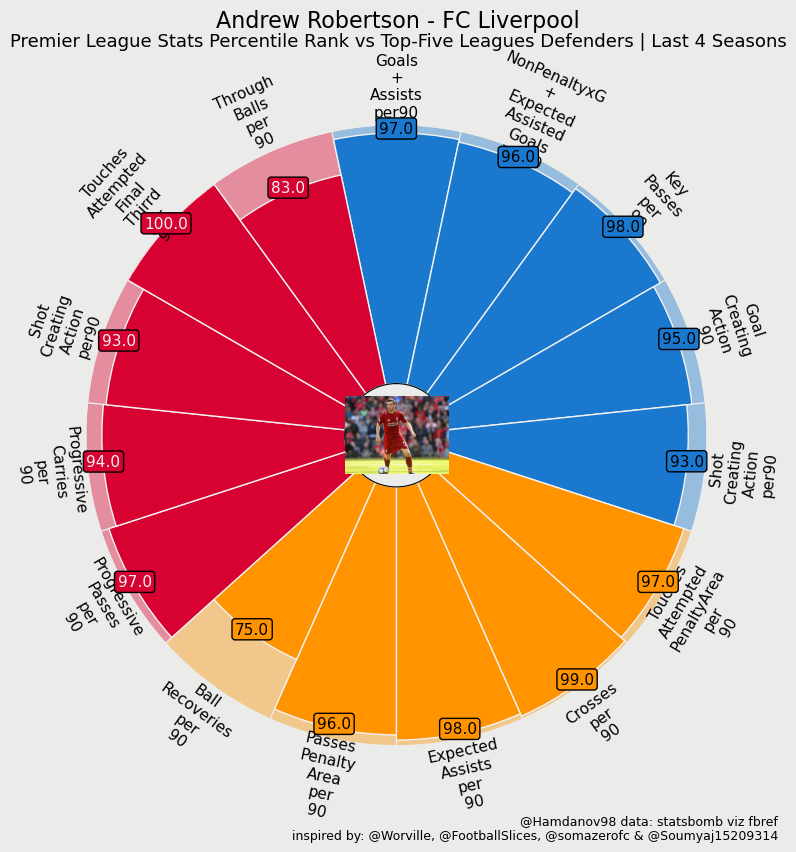

In [14]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    robertson_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Andrew Robertson - FC Liverpool", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | Last 4 Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Robertson_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90', 'Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in defense_players.columns:
        defense_players[feature] = -defense_players[feature]
        player_2024[feature]=-player_2024[feature]

In [16]:
# Normalize data
numerical_defense_players = defense_players[params].replace([np.inf, -np.inf], 0)
normalized_defense_players = (numerical_defense_players - numerical_defense_players.mean()) / numerical_defense_players.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_defense_players)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [17]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_defense_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=defense_players.index)

In [18]:
# Get robertson's row and compute cosine similarity
robertson_index = defense_players.index[defense_players['Player'] == 'Andrew Robertson'][0]
robertson_data = transformed_df.loc[robertson_index].values.reshape(1, -1)

# Remove robertson from the dataset for comparison
transformed_df = transformed_df.drop(index=robertson_index)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, robertson_data).flatten()
transformed_df['similarity_to_robertson'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_robertson', ascending=False).index
top_similar_players = defense_players.loc[top_similar_players_indices]

In [20]:
# Visualize the results
defense_players['similarity_to_robertson'] = transformed_df['similarity_to_robertson']
defense_players_sorted = defense_players.sort_values(by='similarity_to_robertson', ascending=False)
defense_players_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_robertson
206,568,Reece James,eng ENG,DF,Chelsea,eng Premier League,23.0,1999.0,74.0,61.0,5481,60.9,0.11,0.31,0.11,0.31,0.09,0.30,0.09,0.30,138.0,92.0,67.0,38.0,28.0,88.10,2.49,18.70,38.79,31.31,2.35,88.10,2.27,1.51,0.62,51.30,242.56,122.35,3.02,2.15,0.79,-1.08,-0.97,61.69,8.57,3.55,0.31,2.71,0.34,0.15,0.20,0.13,2.71,0.23,0.03,0.02,0.00,0.03,0.00,4047.0,4766.0,85.0,64454.0,16433.0,2106.0,2263.0,93.0,1543.0,1776.0,87.0,286.0,462.0,62.0,0.0,0.20,0.19,-0.01,1.80,3.57,1.95,0.65,6.03,78.26,67.65,10.34,1.33,0.03,0.49,5.63,7.88,1.13,0.56,0.41,0.0,66.45,0.26,1.35,1.43,0.41,1.65,5.87,1.33,1.3,1.3,57.0,-0.18,-0.02,-0.00,-0.98,1.08,0.15,0.75,1.32,0.02,-0.03,5.60,1.32,-1.00,3,3,0,0,0,0,0.991260
175,493,Caio Henrique Oliveira Silva,br BRA,DF,Monaco,fr Ligue 1,26.0,1997.0,100.0,89.0,7926,88.1,0.03,0.27,0.03,0.27,0.02,0.20,0.02,0.20,92.0,48.0,52.0,38.0,41.0,68.17,2.45,17.37,31.01,20.52,1.43,68.17,1.04,0.55,0.43,40.83,235.31,130.76,2.52,2.11,0.39,-1.15,-0.26,40.48,6.06,2.77,0.41,1.93,0.57,0.06,0.07,0.09,1.93,0.28,0.07,0.00,0.01,0.03,0.01,4060.0,5325.0,76.0,65849.0,22968.0,2015.0,2257.0,89.0,1670.0,2127.0,79.0,274.0,681.0,40.0,0.0,0.17,0.17,0.07,1.36,3.53,1.34,0.35,5.10,60.44,48.28,11.99,2.03,0.05,0.24,4.27,8.65,1.29,0.69,0.43,0.0,46.08,0.18,1.10,0.39,0.15,2.66,7.07,1.81,0.8,0.8,37.0,-0.09,-0.00,-0.00,-0.49,0.67,0.08,0.78,1.30,0.02,-0.00,6.19,0.55,-0.93,3,0,0,0,3,0,0.985850
64,174,Hamari Traoré,ml MLI,DF,Rennes,fr Ligue 1,31.0,1992.0,99.0,95.0,8418,93.5,0.05,0.21,0.05,0.21,0.05,0.16,0.05,0.16,73.0,42.0,58.0,31.0,42.0,78.07,2.70,16.64,41.71,20.17,1.75,78.07,0.78,0.45,0.33,47.59,230.86,112.49,2.05,2.00,0.32,-0.91,-0.26,50.56,6.19,2.49,0.39,2.14,0.14,0.04,0.11,0.03,2.14,0.31,0.02,0.02,0.02,0.01,0.00,5361.0,64

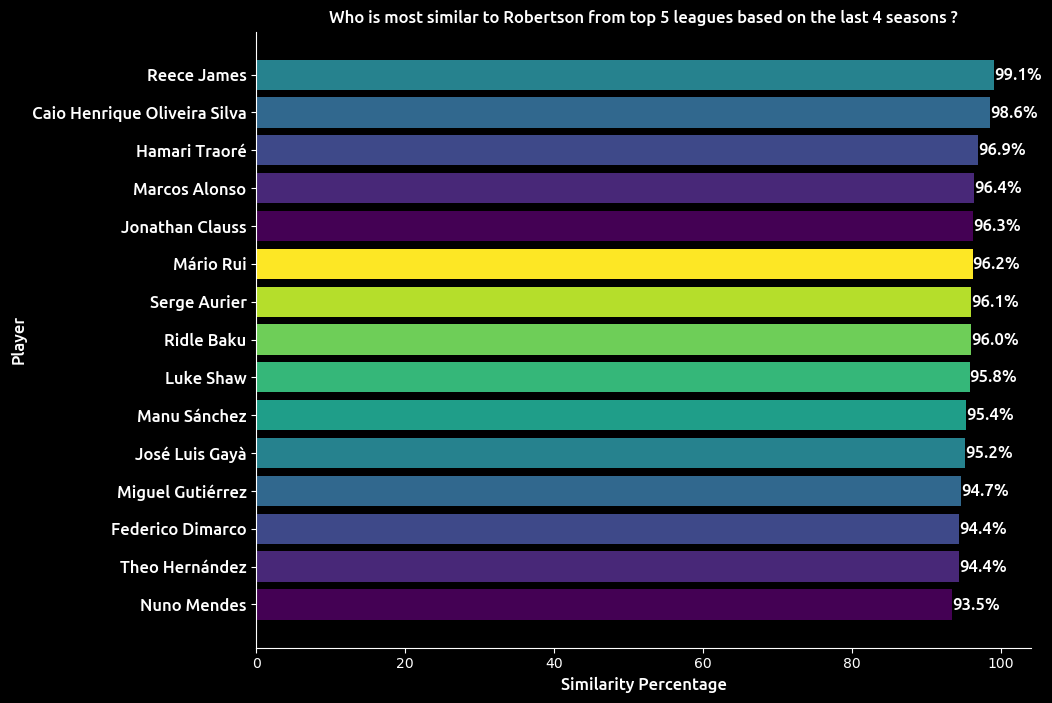

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the defense_players DataFrame by similarity_to_robertson in descending order
defense_players_sorted = defense_players.sort_values(by='similarity_to_robertson', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defense_players_sorted['Player'].head(15)[::-1], (defense_players_sorted['similarity_to_robertson'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Robertson from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defense_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()

In [22]:
Caio=defense_players[defense_players['Player']=='Caio Henrique Oliveira Silva']
Caio

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_robertson
175,493,Caio Henrique Oliveira Silva,br BRA,DF,Monaco,fr Ligue 1,26.0,1997.0,100.0,89.0,7926,88.1,0.03,0.27,0.03,0.27,0.02,0.2,0.02,0.2,92.0,48.0,52.0,38.0,41.0,68.17,2.45,17.37,31.01,20.52,1.43,68.17,1.04,0.55,0.43,40.83,235.31,130.76,2.52,2.11,0.39,-1.15,-0.26,40.48,6.06,2.77,0.41,1.93,0.57,0.06,0.07,0.09,1.93,0.28,0.07,0.0,0.01,0.03,0.01,4060.0,5325.0,76.0,65849.0,22968.0,2015.0,2257.0,89.0,1670.0,2127.0,79.0,274.0,681.0,40.0,0.0,0.17,0.17,0.07,1.36,3.53,1.34,0.35,5.1,60.44,48.28,11.99,2.03,0.05,0.24,4.27,8.65,1.29,0.69,0.43,0.0,46.08,0.18,1.1,0.39,0.15,2.66,7.07,1.81,0.8,0.8,37.0,-0.09,-0.0,-0.0,-0.49,0.67,0.08,0.78,1.3,0.02,-0.0,6.19,0.55,-0.93,3,0,0,0,3,0,0.98585


In [23]:
# Calculate percentile ranks for players in the larger DataFrame
players_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of Ndayishimiye's stats from the percentile ranks DataFrame
Caio_percentile_ranks = round(players_percentile_ranks.iloc[[175]], 0)

# Print the percentile ranks for schlotterbeck
Caio_percentile_ranks

,G+A-PK_per90,npxG+xAG_per90,Key_Passes_per_90,Goal_Creating_Action_90,Shot_Creating_Action_per90,Touches_Att_Pen_per_90,Crosses_per_90,xA_per_90,Passes_Penalty_Area_per_90,Ball_Recoveries_per_90,Progressive_Passes_per_90,Progressive_Carries_per_90,Shot_Creating_Action_per90,Touches_Att_3rd_per_90,Through_Balls_per_90
175,96.0,91.0,95.0,94.0,88.0,82.0,93.0,96.0,93.0,76.0,90.0,87.0,88.0,92.0,72.0


In [24]:
Caio_percentile_ranks_list = Caio_percentile_ranks.values.flatten().tolist()

Caio_percentile_ranks_list

[96.0,
 91.0,
 95.0,
 94.0,
 88.0,
 82.0,
 93.0,
 96.0,
 93.0,
 76.0,
 90.0,
 87.0,
 88.0,
 92.0,
 72.0]

In [25]:
image_path = "Caio.png"
fdj_cropped = Image.open(image_path)

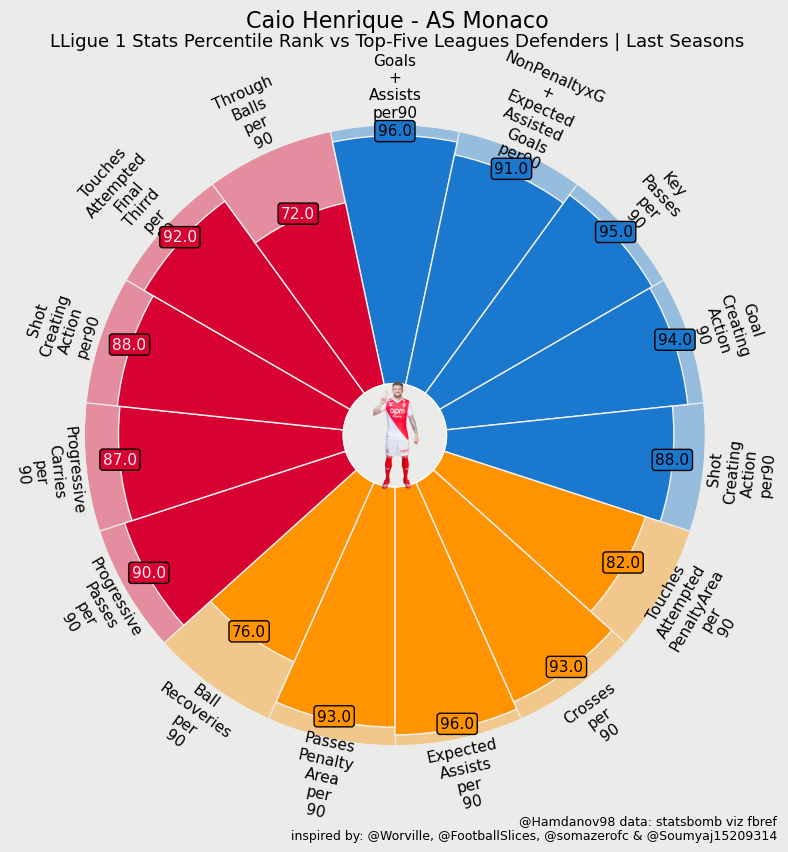

In [26]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    Caio_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Caio Henrique - AS Monaco", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"LLigue 1 Stats Percentile Rank vs Top-Five Leagues Defenders | Last Seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Caio_Percentile.png',dpi=500, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')  # save as png